### Imports

In [2]:
!pip install mne

### Loading edf

In [133]:
file = "..\dataverse_files\h01.edf"
edfs_path = "..\dataverse_files"
manifest_path = "..\dataverse_files\MANIFEST.txt"

In [134]:
import os
import mne

def load_edfs(edfs_path):
    raw_edfs = []
    
    edfs_file_names = [f for f in os.listdir(edfs_path) if f.endswith('.edf')]
    
    for file_name in edfs_file_names:
        path = edfs_path + '\\' + file_name 
        data = mne.io.read_raw_edf(path, preload=True, verbose=False)
        raw_edfs.append(data)

    return raw_edfs

In [135]:
raw_edfs = load_edfs(edfs_path)

In [136]:
len(raw_edfs)

28

### Preprocessing

Effective window size : 8.192 (s)


C:\Users\Daniel\AppData\Local\Temp\ipykernel_1804\3211769670.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_patient0.plot_psd(area_mode='range', tmax=10.0, average=False);


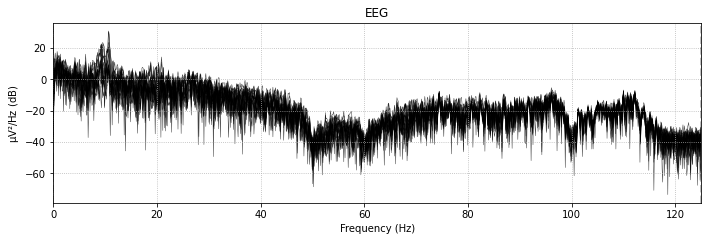

In [32]:
raw_patient0 = raw_edfs[0]

# selection = mne.read_vectorview_selection('Left-temporal')
# picks = mne.pick_types(raw_patient0.info, meg='mag', eeg=False, eog=False,
#                        stim=False, exclude='bads', selection=selection)

raw_patient0.plot_psd(area_mode='range', tmax=10.0, average=False);

### Filtration

Opening raw-browser...


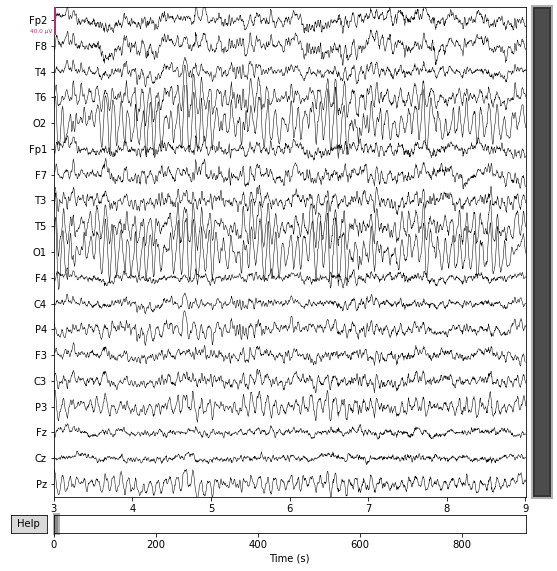

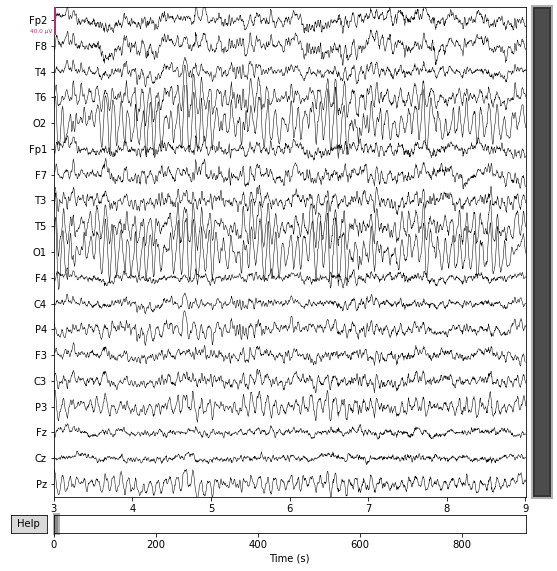

In [33]:
raw_patient0.copy().pick_types(eeg=True).plot(start=3, duration=6)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 83 samples (0.332 sec)

Effective window size : 8.192 (s)


C:\Users\Daniel\AppData\Local\Temp\ipykernel_1804\618911977.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_patient0.plot_psd(area_mode='range', average=False);


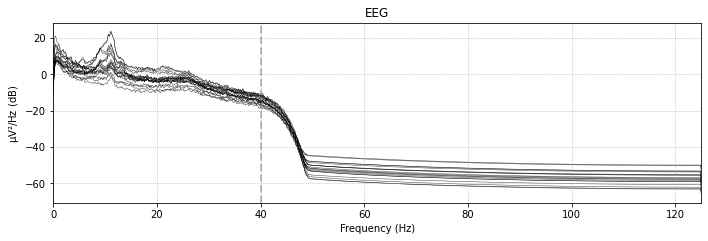

In [34]:
# low pass
raw_patient0.filter(None, 40., fir_design='firwin')
raw_patient0.plot_psd(area_mode='range', average=False);

### Segmentation

In [35]:
!pip install mne-connectivity

In [36]:
epochs = mne.make_fixed_length_epochs(raw_patient0, duration=25, preload=True)

Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 6250 original time points ...
0 bad epochs dropped


In [37]:
epochs.to_data_frame()

,time,condition,epoch,Fp2,F8,T4,T6,O2,Fp1,F7,...,O1,F4,C4,P4,F3,C3,P3,Fz,Cz,Pz
0,0,1,0,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,...,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500
1,4,1,0,-0.013165,-0.051168,-0.141553,-0.045690,-0.019511,-0.137629,-0.016629,...,0.061897,-0.136900,-0.178747,-0.161818,0.035682,0.086381,0.036654,-0.042886,-0.050014,-0.082717
2,8,1,0,0.193410,0.171581,0.050402,0.108617,0.079950,-0.104558,-0.018838,...,0.042487,-0.086834,-0.105690,-0.101325,0.008695,0.004990,-0.068254,-0.042575,-0.058942,-0.156065
3,12,1,0,0.414561,0.456421,0.410248,0.324050,0.192855,0.064007,-0.002592,...,-0.071373,0.096946,0.153120,0.116469,-0.036361,-0.164928,-0.239526,0.007202,0.001351,-0.158983
4,16,1,0,0.215639,0.302485,0.418006,0.256428,0.095735,0.152239,0.020006,...,-0.194935,0.164545,0.265504,0.192684,0.007435,-0.168781,-0.244139,0.059761,0.106119,-0.039520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231245,24980,1,36,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,...,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500
231246,24984,1,36,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,...,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500
231247,24988,1,36,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,...,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500
231248,24992,1,36,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,...,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500


Opening epochs-browser...


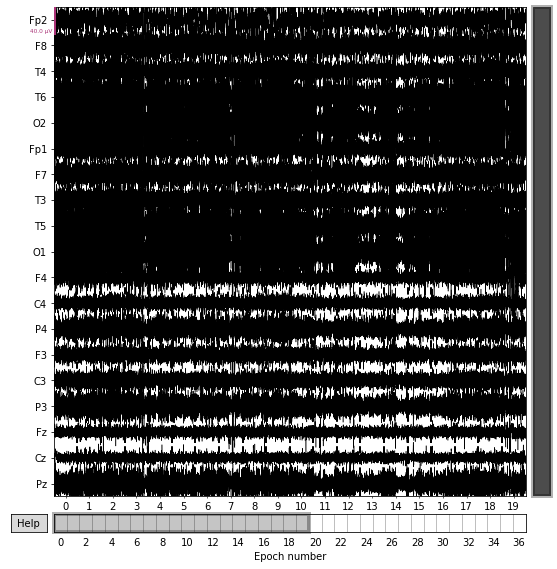

In [38]:
epochs.plot(block=True);

In [39]:
len(epochs)

37

In [40]:
type(epochs.get_data())

numpy.ndarray

Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\Daniel\AppData\Local\Temp\ipykernel_1804\843008356.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  event_related_plot = epochs.plot_image(picks=['F8'])


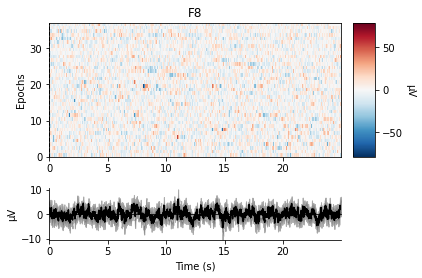

In [41]:
event_related_plot = epochs.plot_image(picks=['F8'])

In [42]:
epochs.get_data()[:1]

array([[[ 2.50000000e-09, -1.31653107e-08,  1.93409788e-07, ...,
         -5.83610283e-06, -6.16348875e-06, -7.24177302e-06],
        [ 2.50000000e-09, -5.11675054e-08,  1.71580963e-07, ...,
         -7.94684012e-06, -8.38121580e-06, -9.43480190e-06],
        [ 2.50000000e-09, -1.41552690e-07,  5.04017420e-08, ...,
         -4.72941579e-06, -3.83743578e-06, -3.62990576e-06],
        ...,
        [ 2.50000000e-09, -4.28858064e-08, -4.25754630e-08, ...,
         -6.53819648e-08, -3.56351751e-07, -8.44396514e-07],
        [ 2.50000000e-09, -5.00140997e-08, -5.89424612e-08, ...,
          6.14911357e-06,  4.69183008e-06,  3.37693391e-06],
        [ 2.50000000e-09, -8.27171964e-08, -1.56065104e-07, ...,
          1.56052697e-05,  1.11485061e-05,  6.66492097e-06]]])

In [43]:
from mne_connectivity import envelope_correlation
corr_matrix = envelope_correlation(epochs).get_data()
print(corr_matrix.shape)

Adding metadata with 3 columns
(37, 19, 19, 1)


In [48]:
corr_matrix

array([[[0.        ],
        [0.14159723],
        [0.09777065],
        [0.08285447],
        [0.08649671],
        [0.17010213],
        [0.14040257],
        [0.04988495],
        [0.02514823],
        [0.04666294],
        [0.11067566],
        [0.10456324],
        [0.08880587],
        [0.08008966],
        [0.06078762],
        [0.0297706 ],
        [0.09930783],
        [0.14109625],
        [0.07472738]],

       [[0.14159723],
        [0.        ],
        [0.1340815 ],
        [0.11652621],
        [0.08817826],
        [0.12643731],
        [0.14556011],
        [0.09487266],
        [0.06835107],
        [0.0499993 ],
        [0.14185045],
        [0.13593605],
        [0.13119996],
        [0.11246331],
        [0.10055029],
        [0.05856801],
        [0.11520905],
        [0.10421863],
        [0.10205097]],

       [[0.09777065],
        [0.1340815 ],
        [0.        ],
        [0.17114085],
        [0.19165854],
        [0.09836022],
        [0.09231688],
      

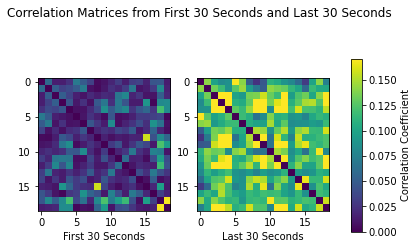

In [45]:
import numpy as np
from matplotlib import pyplot as plt

first_30 = corr_matrix[0]

last_30 = corr_matrix[-1]
corr_matrices = [first_30, last_30]
color_lims = np.percentile(np.array(corr_matrices), [5, 95])
titles = ['First 30 Seconds', 'Last 30 Seconds']

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Correlation Matrices from First 30 Seconds and Last 30 Seconds')
for ci, corr_matrix in enumerate(corr_matrices):
    ax = axes[ci]
    mpbl = ax.imshow(corr_matrix, clim=color_lims)
    ax.set_xlabel(titles[ci])
fig.subplots_adjust(right=0.8)
cax = fig.add_axes([0.85, 0.2, 0.025, 0.6])
cbar = fig.colorbar(ax.images[0], cax=cax)
cbar.set_label('Correlation Coefficient')

In [83]:
print(epochs.get_data().ndim)

3


In [130]:
def getLabel(edf):
    patient_edf_file_name = raw_edfs[0].filenames[0].split('\\')[-1]
    print(patient_edf_file_name)
    isHealthy = patient_edf_file_name.lower().startswith('h')
    return int(isHealthy == True)

In [132]:
epochs_list = []
labels = []
for edf in raw_edfs:
    epochs  = mne.make_fixed_length_epochs(edf, duration=25, preload=True, verbose=False)
#     np.concatenate((epochs_data, epochs.get_data()))
    epochs_list.append(epochs)
    label = getLabel(edf)
    labels.extend([label for epoch in epochs])

h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf
h01.edf


In [129]:
for label in labels:
    if(label == 1):
        print(label)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [113]:
len(labels)

1142

In [72]:
len(epochs_list[0])

37

In [73]:
len(epochs_list)

28

In [76]:
sum = 0
epoch_lengths = []
for epochs in epochs_list:
    epoch_lengths.append(len(epochs))
    sum += len(epochs)
    
print(epoch_lengths)
print(sum)

[37, 36, 36, 37, 37, 37, 36, 36, 36, 44, 36, 36, 38, 34, 33, 45, 38, 48, 35, 29, 53, 36, 47, 34, 54, 43, 45, 86]
1142


In [58]:
epochs = mne.concatenate_epochs(epochs_list)

Not setting metadata
1036 matching events found
No baseline correction applied
0 bad epochs dropped


In [59]:
len(epochs)

1036

### Feature extraction

In [61]:
from mne.time_frequency import psd_welch

def eeg_power_band(epochs):
    """EEG relative power band feature extraction.

    This function takes an ``mne.Epochs`` object and creates EEG features based
    on relative power in specific frequency bands that are compatible with
    scikit-learn.

    Parameters
    ----------
    epochs : Epochs
        The data.

    Returns
    -------
    X : numpy array of shape [n_samples, 5]
        Transformed data.
    """
    # specific frequency bands
    FREQ_BANDS = {"delta": [0.5, 4.5],
                  "theta": [4.5, 8.5],
                  "alpha": [8.5, 11.5],
                  "sigma": [11.5, 15.5],
                  "beta": [15.5, 30]}

    psds, freqs = psd_welch(epochs, picks='eeg', fmin=0.5, fmax=30.)
    # Normalize the PSDs
    psds /= np.sum(psds, axis=-1, keepdims=True)

    X = []
    for fmin, fmax in FREQ_BANDS.values():
        psds_band = psds[:, :, (freqs >= fmin) & (freqs < fmax)].mean(axis=-1)
        X.append(psds_band.reshape(len(psds), -1))

    return np.concatenate(X, axis=1)

In [62]:
features = eeg_power_band(epochs)

Effective window size : 1.024 (s)


In [64]:
features.shape

(1036, 95)

In [67]:
len(features[0])

95

### Classification

In [68]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
pipe = make_pipeline(FunctionTransformer(eeg_power_band, validate=False),
                     RandomForestClassifier(n_estimators=100, random_state=42))

X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

# Train
# y_train = epochs_train.events[:, 2]
pipe.fit(epochs_train, y_train)

# Test
y_pred = pipe.predict(epochs_test)

# Assess the results
y_test = epochs_test.events[:, 2]
acc = accuracy_score(y_test, y_pred)

print("Accuracy score: {}".format(acc))

NameError: name 'epochs_train' is not defined